# Lab 3: Códigos Convolucionais

Alunos: Fernando Zanchitta e Guilherme Kowalczuk

# 1. Simulação

In [2]:
from channel import BSC
from encoder import NaiveEncoder, ConvolutionalEncoder
from lab1 import Simulator
from helpers import safe_load

import numpy as np
import random
random.seed(2023)

p = [5e-1, 2e-1, 1e-1, 5e-2, 2e-2, 1e-2, 5e-3, 2e-3, 1e-3, 5e-4, 2e-4, 1e-4, 5e-5, 2e-5, 1e-5]

## 1.1. Naive Encoder

In [3]:
k = 4
l = 1000000//k
naive_encoder = NaiveEncoder()

channels = map(BSC, p)
sim = map(lambda channel: Simulator(naive_encoder, channel, k=k, l=l), channels)
simulated = zip(p, map(Simulator.simulate, sim))
naive_sim = safe_load('lab3_values/naive.pickle', lambda: list(simulated))

print(naive_sim)

[(0.5, 0.500831), (0.2, 0.199307), (0.1, 0.100258), (0.05, 0.050281), (0.02, 0.020018), (0.01, 0.009992), (0.005, 0.004897), (0.002, 0.001971), (0.001, 0.001009), (0.0005, 0.000483), (0.0002, 0.000207), (0.0001, 0.000105), (5e-05, 4.1e-05), (2e-05, 2e-05), (1e-05, 1.2e-05)]


## 1.2. Convolutional Encoder

In [33]:
p = np.logspace(np.log10(0.1), np.log10(0.023), 20)

def simulate_convolutional(m,G,k=None):
    n = 3
    conv_encoder = ConvolutionalEncoder(n, m, G)

    conv_sim = []
    for prob in p:
        if k is None:
            sim_k = int(8000*(1-prob)/prob) # min(int(8000*(1-prob)/prob), 1_000_000)
        else:
            sim_k = k
        channel = BSC(prob)
        sim = Simulator(conv_encoder, channel, k=sim_k, l=1)
        simulated = sim.simulate()
        conv_sim.append(simulated)

    return list(zip(p, conv_sim))

mG = [
    (3, np.array([[1,0,1,1], [1,1,0,1], [1,1,1,1]])),
    (4, np.array([[1,0,1,0,1], [1,1,0,1,1], [1,1,1,1,1]])), 
    (6, np.array([[1,0,0,1,1,1,1], [1,0,1,0,1,1,1], [1,1,0,1,1,0,1]])),
]

conv_sim = []
for m,G in mG:
    sim = safe_load(f'lab3_values/conv{m}_logspace', lambda: simulate_convolutional(m,G))
    conv_sim.append(sim)
    print(f'm={m}')
    print(sim)

100%|██████████| 339826/339826 [00:57<00:00, 5892.22it/s]


m=3
[(0.1, 0.008972222222222222), (0.0925564583757491, 0.006311119044279831), (0.08566697987061772, 0.003665792185889628), (0.07929032256570966, 0.002874212820926853), (0.07338831440152822, 0.0020295221217911277), (0.06792562467171435, 0.001730813026645411), (0.06286955252574286, 0.0008721393410316402), (0.05818983121450888, 0.00041704960573365975), (0.053858446906975575, 0.0002846225549143642), (0.04984947099327976, 0.0002819986490297279), (0.0461389048704261, 0.00017534418854941986), (0.04270453628142239, 0.0001282530264926143), (0.03952580634787139, 8.230495012834428e-05), (0.03658368650004678, 1.898650059807477e-05), (0.033860564567730324, 1.7523645969780472e-05), (0.03134013934992497, 2.4265660450613316e-05), (0.02900732303231507, 1.1202724502599032e-05), (0.026848150868323765, 1.0345826493592485e-05), (0.024849697583098396, 0.0), (0.023, 2.942682431597347e-06)]


100%|██████████| 339826/339826 [01:56<00:00, 2910.81it/s]


m=4
[(0.1, 0.005541666666666667), (0.0925564583757491, 0.0037101730139099615), (0.08566697987061772, 0.0022486648552422), (0.07929032256570966, 0.0011518380967759298), (0.07338831440152822, 0.0010791117623182092), (0.06792562467171435, 0.0004919152812571169), (0.06286955252574286, 0.0003186662976846378), (0.05818983121450888, 0.00023941736625450837), (0.053858446906975575, 0.00012096458583860478), (0.04984947099327976, 0.0002033013516260829), (0.0461389048704261, 4.232445930503238e-05), (0.04270453628142239, 2.2304874172628573e-05), (0.03952580634787139, 0.0), (0.03658368650004678, 0.0), (0.033860564567730324, 2.190455746222559e-05), (0.03134013934992497, 1.6177106967075542e-05), (0.02900732303231507, 0.0), (0.026848150868323765, 3.448608831197495e-06), (0.024849697583098396, 0.0), (0.023, 0.0)]


100%|██████████| 339826/339826 [14:24<00:00, 393.29it/s]  


m=6
[(0.1, 0.0016527777777777778), (0.0925564583757491, 0.0004844899468336032), (0.08566697987061772, 0.00093694368968425), (0.07929032256570966, 0.0005705366273749933), (0.07338831440152822, 5.940064746705739e-05), (0.06792562467171435, 0.0001002049647005238), (0.06286955252574286, 1.677191040445462e-05), (0.05818983121450888, 3.861570423459813e-05), (0.053858446906975575, 2.1346691618577315e-05), (0.04984947099327976, 0.0), (0.0461389048704261, 1.8139053987871018e-05), (0.04270453628142239, 0.0), (0.03952580634787139, 0.0), (0.03658368650004678, 0.0), (0.033860564567730324, 0.0), (0.03134013934992497, 0.0), (0.02900732303231507, 0.0), (0.026848150868323765, 0.0), (0.024849697583098396, 0.0), (0.023, 0.0)]


In [31]:
from scipy import special as sp
from math import sqrt


def qfunc(x):
    return 0.5-0.5*sp.erf(x/sqrt(2))

def invqfunc(x):
    return sqrt(2)*sp.erfinv(1-2*x)

def translate(p, R, db=True):
    """Eb/N0 dado probabilidade p do BSC(BPSK)"""
    eb_n0 = map(lambda x: (invqfunc(x)**2)/(2*R), p)
    if db:
        eb_n0 = map(lambda x: 10*np.log10(x), eb_n0)
    return list(eb_n0)


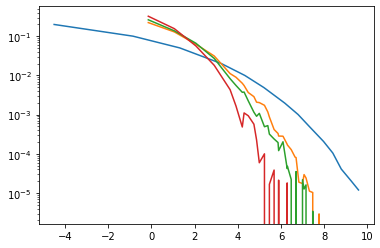

In [49]:
import matplotlib.pyplot as plt

p = [5e-1, 2e-1, 1e-1, 5e-2, 2e-2, 1e-2, 5e-3, 2e-3, 1e-3, 5e-4, 2e-4, 1e-4, 5e-5, 2e-5, 1e-5]

fig = plt.figure()
ax = plt.gca()
plt.plot(translate([k for k,_ in naive_sim[1:]], 1), [v for _,v in naive_sim[1:]])
plt.plot(translate([k for k,_ in conv_sim[0][1:]], 1/3), [v for _,v in conv_sim[0][1:]])
plt.plot(translate([k for k,_ in conv_sim[1][1:]], 1/3), [v for _,v in conv_sim[1][1:]])
plt.plot(translate([k for k,_ in conv_sim[2][1:]], 1/3), [v for _,v in conv_sim[2][1:]])

# print(translate([k for k,_ in conv_sim[0][1:]], 1/3))
# print([k for k,_ in conv_sim[0][1:]])
ax.set_yscale('log')
# ax.set_xscale('log')
# ax.invert_xaxis()

In [52]:
conv_sim = []
for m in [3,4,6]:
    original = safe_load(f'lab3_values/conv{m}_logspace3.pickle', lambda: None)
    extra = safe_load(f'lab3_values/conv{m}_logspace_extra.pickle', lambda: None)
    sim = original + extra
    sim.sort(reverse=True)
    # final_sim = [sim[0]]
    # for item in sim[1:]:
    #     _, prob_item = item
    #     _, prob_prev = final_sim[-1]
    #     # print(prob_item)
    #     # print(prob_prev)
    #     # print('--')
    #     if prob_item < prob_prev:
    #         final_sim.append(item)

    conv_sim.append(sim)
    print(f'm={m}')
    print(sim)

m=3
[(0.25, 0.326875), (0.2110397281373741, 0.22252315511418733), (0.1781510674091871, 0.12865465384094296), (0.1503878113336714, 0.06259541984732825), (0.12695121127613088, 0.03131816198923949), (0.10716699645770002, 0.011147954207865084), (0.1, 0.008972222222222222), (0.0925564583757491, 0.006311119044279831), (0.09046597519092779, 0.005520259601397471), (0.08566697987061772, 0.003665792185889628), (0.07929032256570966, 0.002874212820926853), (0.07636765923990332, 0.0020773905494232917), (0.07338831440152822, 0.0020295221217911277), (0.06792562467171435, 0.001730813026645411), (0.06446644017790729, 0.0011714544123347258), (0.06286955252574286, 0.0008721393410316402), (0.05818983121450888, 0.00041704960573365975), (0.05441992003651937, 0.000330925728756007), (0.053858446906975575, 0.0002846225549143642), (0.04984947099327976, 0.0002819986490297279), (0.0461389048704261, 0.00017534418854941986), (0.04593906051905874, 0.0001685295197510578), (0.04270453628142239, 0.0001282530264926143),